In [2]:
import pandas as pd
df=pd.read_csv("email_spam.csv")
df

,Contains_Free,Contains_Win,Email_Length_gt_100,Spam
0,1,0,0,Spam
1,0,1,1,Spam
2,0,0,0,Not Spam
3,1,1,1,Spam
4,0,0,1,Not Spam
5,1,0,1,Spam
6,0,1,0,Spam
7,0,0,1,Not Spam


In [3]:
#Where the input is contains_free,win,emaillength>100 and the target(output) is spam or not
input=df.drop('Spam',axis='columns')
target=df['Spam']

In [4]:
input

,Contains_Free,Contains_Win,Email_Length_gt_100
0,1,0,0
1,0,1,1
2,0,0,0
3,1,1,1
4,0,0,1
5,1,0,1
6,0,1,0
7,0,0,1


In [5]:
target

0        Spam
1        Spam
2    Not Spam
3        Spam
4    Not Spam
5        Spam
6        Spam
7    Not Spam
Name: Spam, dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder
target=df[['Spam']].copy()
mail=LabelEncoder()
target['Spam_or_not']=mail.fit_transform(target['Spam'])
print(target)


       Spam  Spam_or_not
0      Spam            1
1      Spam            1
2  Not Spam            0
3      Spam            1
4  Not Spam            0
5      Spam            1
6      Spam            1
7  Not Spam            0


In [7]:
target=target['Spam_or_not']  

In [8]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt.fit(input,target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
#accuracy score
dt.score(input,target)

1.0

In [10]:
dt.predict([[1,0,0]])

array([1])

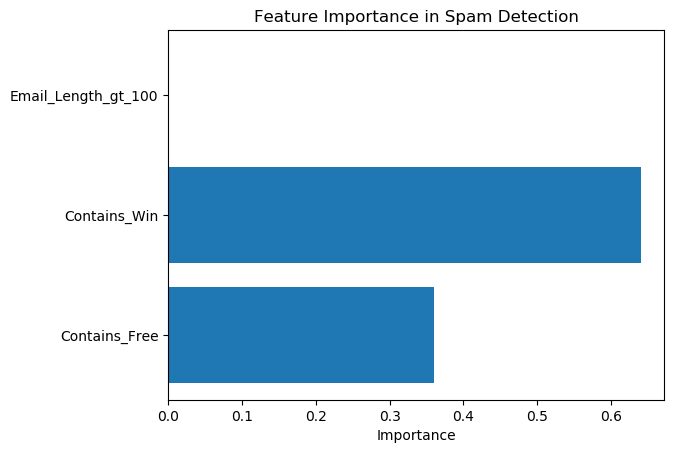

In [11]:
import matplotlib.pyplot as plt
importance=dt.feature_importances_
features=input.columns
plt.barh(features, importance)
plt.xlabel("Importance")
plt.title("Feature Importance in Spam Detection")
plt.show()
